Предсказывание марки машины с помощью сверточной нейронной сети

# Импорт библиотек

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import gdown

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

%matplotlib inline

# Вспомогательные функции

In [ ]:
def showAccuracy(history):
  plt.plot(history.history["accuracy"],
           label="Точность на обучающей выборке.")
  plt.plot(history.history["val_accuracy"],
          label="Точность на проверяющей выборке.")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Точность модели")

  plt.legend()
  plt.show()


def showLoss(history):
  plt.plot(history.history["loss"],
          label="Ошибка на обучающей выборке.")
  plt.plot(history.history["val_loss"],
          label="Ошибка на проверяющей выборке.")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Ошибка модели")

  plt.legend()
  plt.show()

# Подготовка данных

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm -R '/content/cars'
!unzip -q "/content/drive/MyDrive/Lessons/Lesson3/middle_fmr.zip" -d "/content/cars"

rm: cannot remove '/content/cars': No such file or directory


In [ ]:
train_path = "/content/cars"
batch_size = 25
img_width = 96
img_height = 54

In [ ]:
datagen = image.ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    subset="validation"
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


<function matplotlib.pyplot.show>

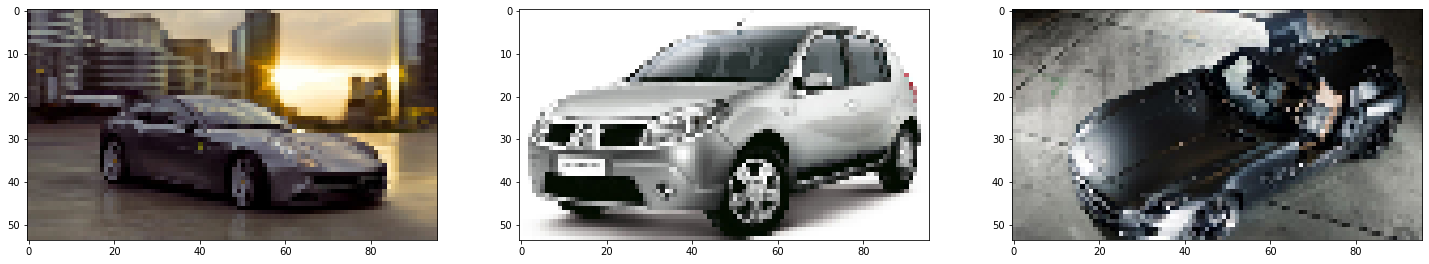

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
for ii in range(3):
  car_path = train_path + '/' + os.listdir(train_path)[ii] + '/'
  img_path = car_path + random.choice(os.listdir(car_path))
  axs[ii].imshow(image.load_img(img_path, target_size=(img_height, img_width)))

plt.show

# Обучение модели

In [ ]:
def create_model(train_generator, width=96, height=54):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(width, height, 3)))
  model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Conv2D(8, (3, 3), padding="same", activation="relu"))
  model.add(Conv2D(8, (3, 3), padding="same", activation="relu"))

  model.add(Flatten())
  # model.add(Dropout(0.2))
  model.add(Dense(len(train_generator.class_indices), activation="softmax"))

  model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

  return model

In [ ]:
# 68% 
# 69 del one layer Conv2D (21)
# 66 change back layer Conv2D (21), add 2 layer_one

# New create_model
# 61% del Dropout layer (7)
# 61% level_up neurons in layers Conv2D to 16 (3)
# 60% level_up neurons in layers Conv2D to 32 (3)
# 63% add new layer of Conv2D(8) (4)
# 63% levelup conv2D(16) (4)
# 64% add layer conv2D(8) (6)
# 67% add layer conv2D(8) (7)
# 67% levelup conv2D(16) (6)
# 66% return back

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
109/109 [==============================] - 36s 326ms/step - loss: 0.6130 - accuracy: 0.4249 - val_loss: 0.5721 - val_accuracy: 0.5126
Epoch 2/40
109/109 [==============================] - 35s 323ms/step - loss: 0.5274 - accuracy: 0.5850 - val_loss: 0.5680 - val_accuracy: 0.5437
Epoch 3/40
109/109 [==============================] - 35s 323ms/step - loss: 0.5154 - accuracy: 0.5887 - val_loss: 0.5451 - val_accuracy: 0.5393
Epoch 4/40
109/109 [==============================] - 35s 324ms/step - loss: 0.4977 - accuracy: 0.6181 - val_loss: 0.5640 - val_accuracy: 0.5215
Epoch 5/40
109/109 [==============================] - 35s 324ms/step - loss: 0.4955 - accuracy: 0.6159 - val_loss: 0.5525 - val_accuracy: 0.5615
Epoch 6/40
109/109 [==============================] - 35s 323ms/step - loss: 0.4882 - accuracy: 0.6284 - val_loss: 0.5429 - val_accuracy: 0.5378
Epoch 7/40
109/109 [==============================] - 35s 323ms/step - loss: 0.4767 - accuracy: 0.6365 - val_loss: 0.5253 - val_ac

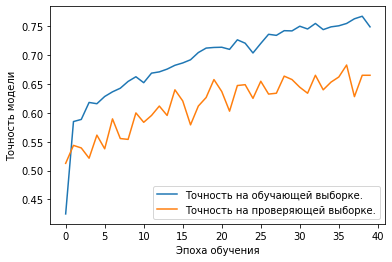

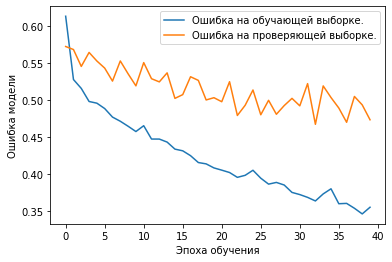

In [ ]:
epochs = 40

model = create_model(train_generator)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    verbose=1,
)

showAccuracy(history)
showLoss(history)
